<a href="https://colab.research.google.com/github/luorix1/ML_DL-self_study/blob/main/visualization_of_cnn.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [ ]:
import tensorflow as tf
from tensorflow import keras
import numpy as np
import pandas as pd
from sklearn.model_selection import train_test_split
import matplotlib.pyplot as plt

In [ ]:
(train_input, train_target), (test_input, test_target) = keras.datasets.fashion_mnist.load_data()

4431872/4422102 [==============================] - 0s 0us/step


In [ ]:
(train_input, train_target), (test_input, test_target) = keras.datasets.fashion_mnist.load_data()
train_scaled = train_input.reshape(-1, 28, 28, 1) / 255.0
train_scaled, val_scaled, train_target, val_target = train_test_split(train_scaled, train_target, test_size=0.2)

In [7]:
model = keras.Sequential()
model.add(keras.layers.Conv2D(32, kernel_size=3, activation='relu', padding='same', input_shape=(28, 28, 1)))
model.add(keras.layers.MaxPooling2D(2))
model.add(keras.layers.Conv2D(64, kernel_size=3, activation='relu', padding='same'))
model.add(keras.layers.MaxPooling2D(2))
model.add(keras.layers.Flatten())
model.add(keras.layers.Dense(100, activation='relu'))
model.add(keras.layers.Dropout(0.4))
model.add(keras.layers.Dense(10, activation='softmax'))
model.compile(optimizer='adam', loss='sparse_categorical_crossentropy', metrics='accuracy')
checkpoint_cb = keras.callbacks.ModelCheckpoint('best-cnn-model.h5')
early_stopping_cb = keras.callbacks.EarlyStopping(patience=2, restore_best_weights=True)
history = model.fit(train_scaled, train_target, epochs=20, validation_data=(val_scaled, val_target), callbacks=[checkpoint_cb, early_stopping_cb])

Epoch 1/20
1500/1500 [==============================] - 11s 7ms/step - loss: 0.5187 - accuracy: 0.8148 - val_loss: 0.3385 - val_accuracy: 0.8788
Epoch 2/20
1500/1500 [==============================] - 8s 6ms/step - loss: 0.3446 - accuracy: 0.8761 - val_loss: 0.2820 - val_accuracy: 0.9000
Epoch 3/20
1500/1500 [==============================] - 8s 6ms/step - loss: 0.2985 - accuracy: 0.8932 - val_loss: 0.2639 - val_accuracy: 0.9018
Epoch 4/20
1500/1500 [==============================] - 8s 6ms/step - loss: 0.2634 - accuracy: 0.9052 - val_loss: 0.2472 - val_accuracy: 0.9100
Epoch 5/20
1500/1500 [==============================] - 9s 6ms/step - loss: 0.2406 - accuracy: 0.9113 - val_loss: 0.2293 - val_accuracy: 0.9148
Epoch 6/20
1500/1500 [==============================] - 9s 6ms/step - loss: 0.2216 - accuracy: 0.9199 - val_loss: 0.2233 - val_accuracy: 0.9212
Epoch 7/20
1500/1500 [==============================] - 9s 6ms/step - loss: 0.2024 - accuracy: 0.9267 - val_loss: 0.2252 - val_accuracy

In [10]:
conv = keras.models.load_model('best-cnn-model.h5')
conv.layers

In [11]:
print(conv.layers[0].weights[0].shape, conv.layers[0].weights[1].shape)

(3, 3, 1, 32) (32,)


In [12]:
conv_weights = conv.layers[0].weights[0].numpy()
print(conv_weights.mean(), conv_weights.std())

-0.033872187 0.25926247


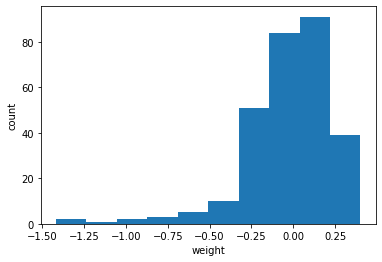

In [14]:
plt.hist(conv_weights.reshape(-1, 1))
plt.xlabel('weight')
plt.ylabel('count')
plt.show()

In [15]:
# using Model class (functional API)
# model = keras.Model(inputs, outputs)
# dense = keras.layers.Dense(100, activation='sigmoid')
# hidden = dense(inputs) (works the same)

In [16]:
# use Input() for input layer (Sequential() automatically creates an InputLayer class)
# inputs = keras.Input(shape=(784,))

In [ ]:
# model.layers(): shows layers except input layer
# model._layers(): shows all layers